In [480]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt

In [481]:
training_data = pd.read_csv("combineddata/training.csv").drop(["Team"], axis = 1)
print(training_data.shape)
training_data = training_data


(6410, 72)


In [482]:
print(training_data.columns)

wide_training = pd.concat([training_data[training_data["Side"] == "Blue"].reset_index(drop = True), training_data[training_data["Side"] == "Red"].reset_index(drop = True)], axis = 1)

print(wide_training)

Index(['Win', 'Kills', 'Towers', 'Drakes', 'Barons', 'Gold', 'Game_Time',
       'TOP_Kills', 'TOP_Deaths', 'TOP_Assists', 'TOP_CS', 'TOP_CSM',
       'TOP_GPM', 'TOP_VSPM', 'TOP_DPM', 'TOP_KAPM', 'TOP_GD15', 'TOP_CSD15',
       'TOP_XPD15', 'JNG_Kills', 'JNG_Deaths', 'JNG_Assists', 'JNG_CS',
       'JNG_CSM', 'JNG_GPM', 'JNG_VSPM', 'JNG_DPM', 'JNG_KAPM', 'JNG_GD15',
       'JNG_CSD15', 'JNG_XPD15', 'MID_Kills', 'MID_Deaths', 'MID_Assists',
       'MID_CS', 'MID_CSM', 'MID_GPM', 'MID_VSPM', 'MID_DPM', 'MID_KAPM',
       'MID_GD15', 'MID_CSD15', 'MID_XPD15', 'BOT_Kills', 'BOT_Deaths',
       'BOT_Assists', 'BOT_CS', 'BOT_CSM', 'BOT_GPM', 'BOT_VSPM', 'BOT_DPM',
       'BOT_KAPM', 'BOT_GD15', 'BOT_CSD15', 'BOT_XPD15', 'SUP_Kills',
       'SUP_Deaths', 'SUP_Assists', 'SUP_CS', 'SUP_CSM', 'SUP_GPM', 'SUP_VSPM',
       'SUP_DPM', 'SUP_KAPM', 'SUP_GD15', 'SUP_CSD15', 'SUP_XPD15', 'Side',
       'Winner', 'Match_Number', 'Tournament', 'Season'],
      dtype='object')
           Win      Kills 

In [483]:

blue_cols = []
red_cols = []
for col in training_data.columns:
    blue_cols.append("B_" + col)
    red_cols.append("R_" + col)

wide_training.columns = blue_cols + red_cols
print(training_data.columns)
wide_training = wide_training.drop(["R_Winner", "R_Side", "B_Side", "R_Tournament", "B_Tournament", "R_Match_Number", "B_Match_Number", "B_Season", "R_Season"], axis = 1)
print(wide_training.shape)


Index(['Win', 'Kills', 'Towers', 'Drakes', 'Barons', 'Gold', 'Game_Time',
       'TOP_Kills', 'TOP_Deaths', 'TOP_Assists', 'TOP_CS', 'TOP_CSM',
       'TOP_GPM', 'TOP_VSPM', 'TOP_DPM', 'TOP_KAPM', 'TOP_GD15', 'TOP_CSD15',
       'TOP_XPD15', 'JNG_Kills', 'JNG_Deaths', 'JNG_Assists', 'JNG_CS',
       'JNG_CSM', 'JNG_GPM', 'JNG_VSPM', 'JNG_DPM', 'JNG_KAPM', 'JNG_GD15',
       'JNG_CSD15', 'JNG_XPD15', 'MID_Kills', 'MID_Deaths', 'MID_Assists',
       'MID_CS', 'MID_CSM', 'MID_GPM', 'MID_VSPM', 'MID_DPM', 'MID_KAPM',
       'MID_GD15', 'MID_CSD15', 'MID_XPD15', 'BOT_Kills', 'BOT_Deaths',
       'BOT_Assists', 'BOT_CS', 'BOT_CSM', 'BOT_GPM', 'BOT_VSPM', 'BOT_DPM',
       'BOT_KAPM', 'BOT_GD15', 'BOT_CSD15', 'BOT_XPD15', 'SUP_Kills',
       'SUP_Deaths', 'SUP_Assists', 'SUP_CS', 'SUP_CSM', 'SUP_GPM', 'SUP_VSPM',
       'SUP_DPM', 'SUP_KAPM', 'SUP_GD15', 'SUP_CSD15', 'SUP_XPD15', 'Side',
       'Winner', 'Match_Number', 'Tournament', 'Season'],
      dtype='object')
(3205, 135)


In [484]:
test_data = pd.read_csv("combineddata/test.csv")
wide_test = pd.concat([test_data[test_data["Side"] == "Blue"].reset_index(drop = True), test_data[test_data["Side"] == "Red"].reset_index(drop = True)], axis = 1)
blue_cols = []
red_cols = []
for col in test_data.columns:
    blue_cols.append("B_" + col)
    red_cols.append("R_" + col)

wide_test.columns = blue_cols + red_cols
print(test_data.columns)
wide_test = wide_test.drop(["R_Winner", "R_Side", "B_Side"], axis = 1)
print(wide_test.shape)


Index(['Team', 'Win', 'Kills', 'Towers', 'Drakes', 'Barons', 'Gold',
       'Game_Time', 'TOP_Kills', 'TOP_Deaths', 'TOP_Assists', 'TOP_CS',
       'TOP_CSM', 'TOP_GPM', 'TOP_VSPM', 'TOP_DPM', 'TOP_KAPM', 'TOP_GD15',
       'TOP_CSD15', 'TOP_XPD15', 'JNG_Kills', 'JNG_Deaths', 'JNG_Assists',
       'JNG_CS', 'JNG_CSM', 'JNG_GPM', 'JNG_VSPM', 'JNG_DPM', 'JNG_KAPM',
       'JNG_GD15', 'JNG_CSD15', 'JNG_XPD15', 'MID_Kills', 'MID_Deaths',
       'MID_Assists', 'MID_CS', 'MID_CSM', 'MID_GPM', 'MID_VSPM', 'MID_DPM',
       'MID_KAPM', 'MID_GD15', 'MID_CSD15', 'MID_XPD15', 'BOT_Kills',
       'BOT_Deaths', 'BOT_Assists', 'BOT_CS', 'BOT_CSM', 'BOT_GPM', 'BOT_VSPM',
       'BOT_DPM', 'BOT_KAPM', 'BOT_GD15', 'BOT_CSD15', 'BOT_XPD15',
       'SUP_Kills', 'SUP_Deaths', 'SUP_Assists', 'SUP_CS', 'SUP_CSM',
       'SUP_GPM', 'SUP_VSPM', 'SUP_DPM', 'SUP_KAPM', 'SUP_GD15', 'SUP_CSD15',
       'SUP_XPD15', 'Side', 'Winner', 'Match_Number', 'Tournament', 'Season'],
      dtype='object')
(449, 143)


In [485]:
# setting up for xgboost
training_label = wide_training["B_Winner"]
training_dat = wide_training.drop(axis = 1, labels = "B_Winner")
test_label = wide_test["B_Winner"]
test_dat = wide_test.drop(axis = 1, labels = ["B_Winner", "B_Team", "R_Team", "B_Tournament", "R_Tournament", "B_Match_Number", "R_Match_Number", "B_Season", "R_Season"])

dtrain = xgb.DMatrix(data = training_dat, label = training_label)
dtest = xgb.DMatrix(data = test_dat, label = test_label)

print(training_dat.shape)
print(test_dat.shape)

(3205, 134)
(449, 134)


In [486]:
param = {'max_depth': 3, 'learning_rate': 0.03, 'objective': 'binary:logistic',
         'alpha': 0.4, 'subsample': 0.8, 'colsample_bynode': 0.5, 'colsample_bytree': 0.5,
         'num_parallel_tree': 100, 'gamma': 0.2}
param['eval_metric'] = 'error'

num_round = 145
evallist = [(dtrain, "train"), (dtest, "test")]
bst = xgb.train(param, dtrain, num_round, evallist, num_boost_round = 1)

c:\Users\carte\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:727: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-error:0.48892	test-error:0.48998
[1]	train-error:0.48892	test-error:0.48998
[2]	train-error:0.47613	test-error:0.43875
[3]	train-error:0.42933	test-error:0.36971
[4]	train-error:0.40499	test-error:0.35412
[5]	train-error:0.39033	test-error:0.33853
[6]	train-error:0.38034	test-error:0.34521
[7]	train-error:0.37691	test-error:0.32517
[8]	train-error:0.37317	test-error:0.32739
[9]	train-error:0.36817	test-error:0.32517
[10]	train-error:0.36412	test-error:0.32517
[11]	train-error:0.35975	test-error:0.33408
[12]	train-error:0.35632	test-error:0.33185
[13]	train-error:0.35538	test-error:0.33853
[14]	train-error:0.35601	test-error:0.33853
[15]	train-error:0.35476	test-error:0.33853
[16]	train-error:0.35663	test-error:0.33853
[17]	train-error:0.35757	test-error:0.33853
[18]	train-error:0.35694	test-error:0.33185
[19]	train-error:0.35569	test-error:0.33185
[20]	train-error:0.35351	test-error:0.32962
[21]	train-error:0.35133	test-error:0.32962
[22]	train-error:0.34914	test-error:0.3273

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

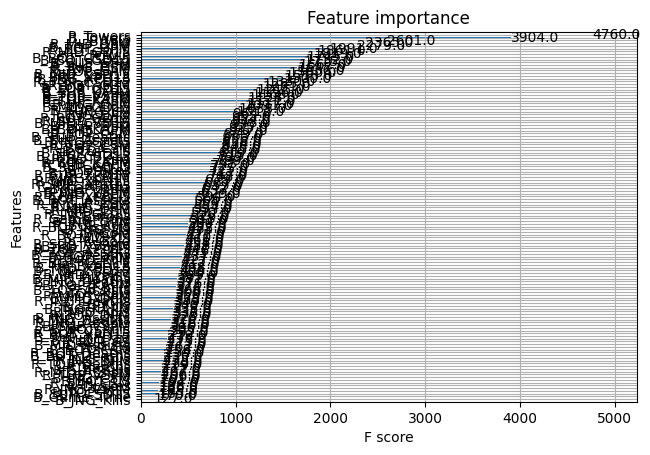

In [461]:
xgb.plot_importance(bst)

In [477]:
predictions = wide_test[["B_Season", "B_Tournament", "B_Team", "R_Team", "B_Match_Number", "B_Winner"]]
predictions.columns = ["Season", "Tournament", "Blue", "Red", "Match_Number", "Blue_Win"]
predictions["Prediction"] = bst.predict(dtest)
predictions["Correct"] = predictions.apply(lambda row: int(abs(row.Blue_Win - row.Prediction) < 0.5), axis = 1)

print(predictions)

       Season                Tournament                 Blue  \
0    lck_2023           LCK Spring 2023         Liiv SANDBOX   
1    lck_2023           LCK Spring 2023    Nongshim RedForce   
2    lck_2023           LCK Spring 2023        Gen.G eSports   
3    lck_2023           LCK Spring 2023        Gen.G eSports   
4    lck_2023           LCK Spring 2023                  DRX   
..        ...                       ...                  ...   
444  lck_2023  LCK Regional Finals 2023                  DRX   
445  lck_2023  LCK Regional Finals 2023  Hanwha Life eSports   
446  lck_2023  LCK Regional Finals 2023            Dplus KIA   
447  lck_2023  LCK Regional Finals 2023  Hanwha Life eSports   
448  lck_2023  LCK Regional Finals 2023  Hanwha Life eSports   

                     Red  Match_Number  Blue_Win  Prediction  Correct  
0      Nongshim RedForce            21       1.0    0.549415        1  
1           Liiv SANDBOX            21       0.0    0.446106        1  
2              

C:\Users\carte\AppData\Local\Temp\ipykernel_6424\2282280879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions["Prediction"] = bst.predict(dtest)
C:\Users\carte\AppData\Local\Temp\ipykernel_6424\2282280879.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions["Correct"] = predictions.apply(lambda row: int(abs(row.Blue_Win - row.Prediction) < 0.5), axis = 1)


In [478]:
summary = pd.DataFrame()

summary = pd.concat([summary, predictions[["Season", "Correct"]].groupby("Season").count()])

summary = pd.concat([summary, predictions[["Season", "Correct"]].groupby("Season").mean()], axis = 1)
summary = pd.concat([summary, predictions[["Season", "Correct"]].groupby("Season").sum()], axis = 1)

summary = summary.reset_index()
summary.columns = ["Season", "Games", "Accuracy", "Correct"]
#summary = pd.concat([summary, predictions[["Tournament", "Correct"]].groupby("Tournament").count().reset_index()])




summary


,Season,Games,Accuracy,Correct
0,lck_2023,449,0.665924,299


In [487]:
summary = pd.DataFrame()

summary = pd.concat([summary, predictions[["Tournament", "Correct"]].groupby("Tournament").count()])

summary = pd.concat([summary, predictions[["Tournament", "Correct"]].groupby("Tournament").mean()], axis = 1)
summary = pd.concat([summary, predictions[["Tournament", "Correct"]].groupby("Tournament").sum()], axis = 1)

summary = summary.reset_index()
summary.columns = ["Tournament", "Games", "Accuracy", "Correct"]
#summary = pd.concat([summary, predictions[["Tournament", "Correct"]].groupby("Tournament").count().reset_index()])



summary

,Tournament,Games,Accuracy,Correct
0,LCK Regional Finals 2023,11,0.818182,9
1,LCK Spring 2023,169,0.686391,116
2,LCK Spring Playoffs 2023,33,0.545455,18
3,LCK Summer 2023,205,0.687805,141
4,LCK Summer Playoffs 2023,31,0.483871,15


In [465]:

match_predictions = pd.concat([predictions.groupby(["Tournament", "Match_Number"]).count()["Prediction"],predictions.groupby(["Tournament", "Match_Number"]).sum()[["Correct", "Blue_Win"]]], axis = 1)
# match_predictions = pd.concat([match_predictions, predictions.drop(["Blue", "Red"], axis = 1).groupby(["Tournament", "Match_Number"]).mean()["Prediction"]], axis = 1)
match_predictions["Match_Correct"] = match_predictions.apply(lambda row: int(row.Correct > row.Prediction / 2), axis = 1)

# predictions[predictions["Match_Number"] == 199]

match_predictions = match_predictions.reset_index()




In [466]:
summary = pd.DataFrame()

summary = pd.concat([summary, match_predictions[["Tournament", "Match_Correct"]].groupby("Tournament").count()])

summary = pd.concat([summary, match_predictions[["Tournament", "Match_Correct"]].groupby("Tournament").mean()], axis = 1)
summary = pd.concat([summary, match_predictions[["Tournament", "Match_Correct"]].groupby("Tournament").sum()], axis = 1)

summary = summary.reset_index()
summary.columns = ["Tournament", "Games", "Accuracy", "Correct"]
#summary = pd.concat([summary, predictions[["Tournament", "Correct"]].groupby("Tournament").count().reset_index()])
summary

,Tournament,Games,Accuracy,Correct
0,LCK Regional Finals 2023,3,1.000000,3
1,LCK Spring 2023,70,0.757143,53
2,LCK Spring Playoffs 2023,8,0.625000,5
3,LCK Summer 2023,90,0.700000,63
4,LCK Summer Playoffs 2023,8,0.375000,3


In [488]:
# 
bst.save_model("models/6_4nominortwoyears.json")